In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime, timedelta
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from pytz import timezone as tz

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.stattools import adfuller

In [4]:
from time import time
from datetime import date
from datetime import datetime

In [5]:
df_energy = pd.read_csv('../data/energy/'+ "eco2mix-regional-cons-def.csv", sep=";",
                parse_dates=["Date - Heure"]).sort_values(by=["Région", "Date - Heure"])

In [6]:
df_energy.head()

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
147167,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2013-01-01 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147170,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:30,2013-01-01 00:30:00+01:00,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,-7551.0
1017843,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,01:00,2013-01-01 01:00:00+01:00,7944.0,252.0,11895.0,257.0,0.0,2828.0,-328.0,67.0,-7029.0
147173,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,01:30,2013-01-01 01:30:00+01:00,7896.0,252.0,12228.0,247.0,0.0,2710.0,-327.0,65.0,-7282.0
1017845,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,02:00,2013-01-01 02:00:00+01:00,7882.0,251.0,12274.0,244.0,0.0,2516.0,-328.0,66.0,-7144.0


In [7]:
df_energy = df_energy[["Région", "Date - Heure", "Consommation (MW)"]]

In [8]:
df_energy.fillna(df_energy.dropna()["Consommation (MW)"].mean(), inplace=True)

In [9]:
df_energy.fillna(df_energy.dropna()["Consommation (MW)"].mean(), inplace=True)
df_energy["date"] = df_energy["Date - Heure"].apply(lambda x: x + timedelta(minutes=x.minute))
df_energy["date"] = df_energy["date"].apply(lambda x: x.astimezone(tz("UTC")))
df_energy["date"] = df_energy["date"].apply(lambda x: x.fromtimestamp(x.timestamp()))
df_energy.head(3)

,Région,Date - Heure,Consommation (MW),date
147167,Auvergne-Rhône-Alpes,2013-01-01 00:00:00+01:00,4528.493194,2013-01-01 00:00:00
147170,Auvergne-Rhône-Alpes,2013-01-01 00:30:00+01:00,8173.000000,2013-01-01 01:00:00
1017843,Auvergne-Rhône-Alpes,2013-01-01 01:00:00+01:00,7944.000000,2013-01-01 01:00:00


In [10]:
# group by day:
df_region_per_hour = df_energy.groupby(["Région", "date"], as_index=False).agg({"Consommation (MW)": np.sum})

# Filter on Ile de France

In [11]:
df_region_per_hour_ile_de_france = df_region_per_hour[df_region_per_hour['Région']=='Ile-de-France']

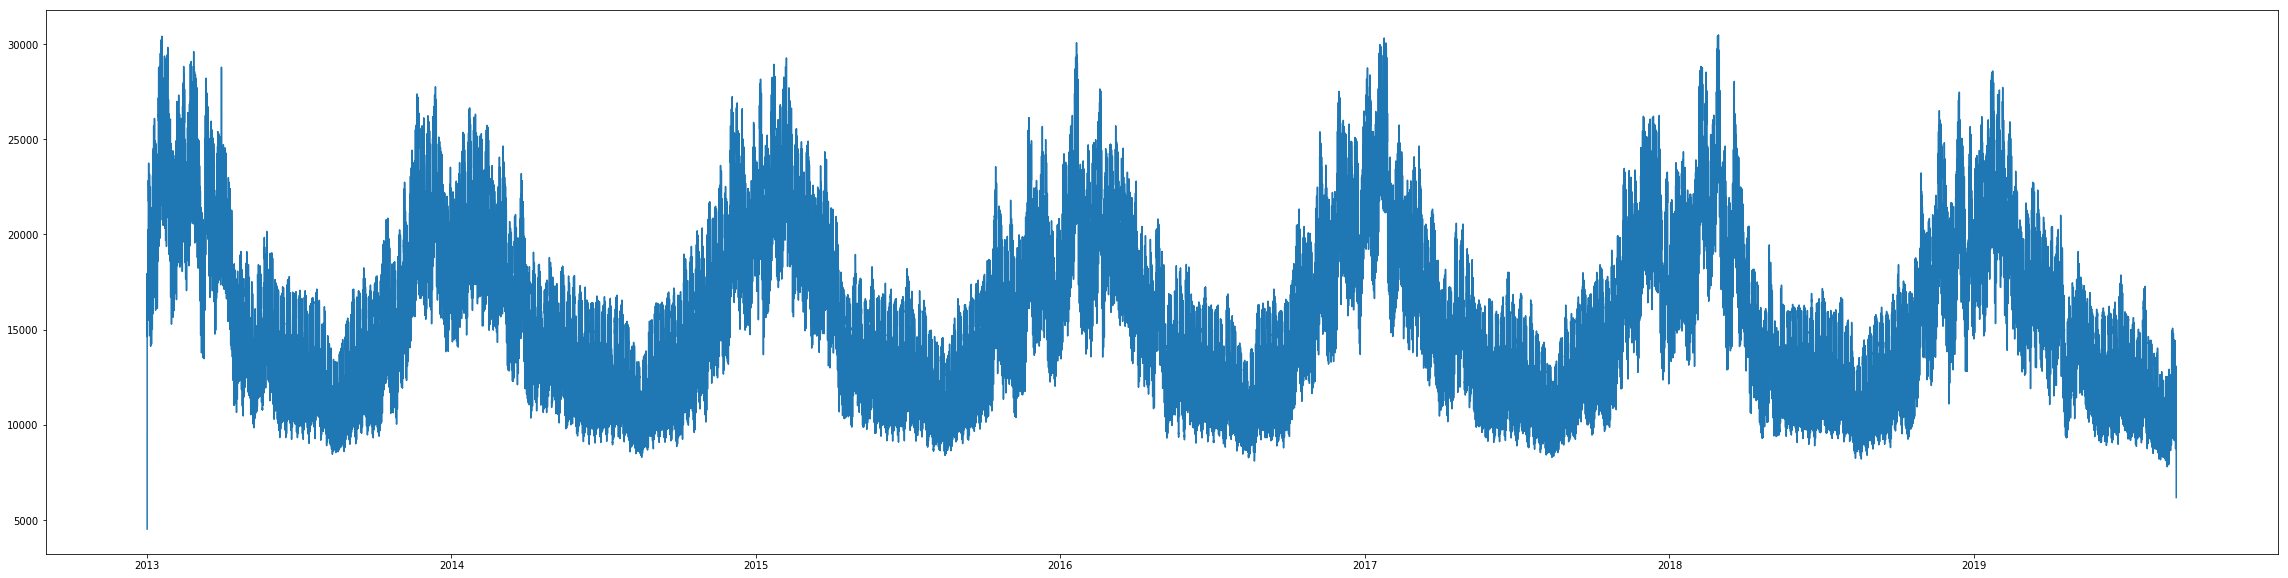

In [12]:
plt.figure(figsize=(40,10))
plt.plot(df_region_per_hour_ile_de_france["date"], df_region_per_hour_ile_de_france["Consommation (MW)"])

# Apply ARIMA:

In [13]:
df_region_per_hour_ile_de_france['date_time']=pd.to_datetime(df_region_per_hour_ile_de_france['date'], format='%Y-%m-%d')

In [27]:
df_region_per_hour_ile_de_france.head()

,Consommation (MW)
date_time,
2013-01-01 00:00:00,4528.493194
2013-01-01 01:00:00,17956.000000
2013-01-01 02:00:00,16728.000000
2013-01-01 03:00:00,15998.000000
2013-01-01 04:00:00,15107.000000


In [15]:
df_region_per_hour_ile_de_france.dtypes

Région                       object
date                 datetime64[ns]
Consommation (MW)           float64
date_time            datetime64[ns]
dtype: object

In [16]:
df_region_per_hour_ile_de_france = df_region_per_hour_ile_de_france.set_index("date_time")

In [17]:
df_region_per_hour_ile_de_france.head()

,Région,date,Consommation (MW)
date_time,,,
2013-01-01 00:00:00,Ile-de-France,2013-01-01 00:00:00,4528.493194
2013-01-01 01:00:00,Ile-de-France,2013-01-01 01:00:00,17956.000000
2013-01-01 02:00:00,Ile-de-France,2013-01-01 02:00:00,16728.000000
2013-01-01 03:00:00,Ile-de-France,2013-01-01 03:00:00,15998.000000
2013-01-01 04:00:00,Ile-de-France,2013-01-01 04:00:00,15107.000000


In [18]:
df_region_per_hour_ile_de_france = df_region_per_hour_ile_de_france.drop('Région', axis=1)

In [19]:
df_region_per_hour_ile_de_france = df_region_per_hour_ile_de_france.drop('date', axis=1)

In [20]:
df_region_per_hour_ile_de_france.tail()

,Consommation (MW)
date_time,
2019-08-31 20:00:00,12319.0
2019-08-31 21:00:00,12256.0
2019-08-31 22:00:00,11851.0
2019-08-31 23:00:00,12503.0
2019-09-01 00:00:00,6185.0


In [21]:
df_region_per_hour_ile_de_france.isnull().sum()

Consommation (MW)    0
dtype: int64

In [22]:
#selecting training set:
df_region_per_hour_ile_de_france_2013_2018 = df_region_per_hour_ile_de_france.ix[:'2018-12-31 00:00:00']


In [23]:
df_region_per_hour_ile_de_france_2013_2018.tail()

,Consommation (MW)
date_time,
2018-12-30 20:00:00,20147.0
2018-12-30 21:00:00,19483.0
2018-12-30 22:00:00,18499.0
2018-12-30 23:00:00,18997.0
2018-12-31 00:00:00,18752.0


In [24]:
# Check stationarity:

def test_stationarity(timeseries):    
    # Determing rolling statistics  
    rolmean = timeseries.rolling(window=356).mean()
    # Plot rolling statistics:  
    orig = plt.plot(timeseries, color='blue',label='Original')  
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')  
    plt.legend(loc='best')  
    plt.title('Rolling Mean')
    plt.figure(figsize=(40,10))
    plt.show(block=False)    
    # Perform Augmented Dickey-Fuller test:  
    print ('Results of Augmented Dickey-Fuller test:')  
    dftest = adfuller(timeseries)  
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])  
    for key,value in dftest[4].items():    
        dfoutput['Critical Value (%s)'%key] = value  
    print (dfoutput)

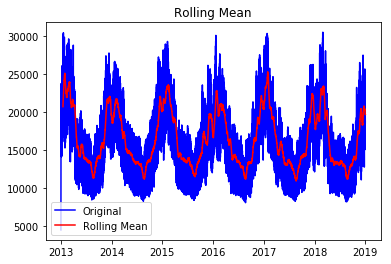

<Figure size 2880x720 with 0 Axes>

Results of Augmented Dickey-Fuller test:
Test Statistic                -7.275240e+00
p-value                        1.550613e-10
#Lags Used                     5.800000e+01
Number of Observations Used    5.249600e+04
Critical Value (1%)           -3.430475e+00
Critical Value (5%)           -2.861595e+00
Critical Value (10%)          -2.566799e+00
dtype: float64


In [25]:
test_stationarity(df_region_per_hour_ile_de_france_2013_2018['Consommation (MW)'])

The Augmented Dickey-Fuller test is showing that the data is stationary: the p-value is small (<0.005) and the Test Statistic is lower than the Critical Value (1%), so it can be concluded with 99% confidence that the data is stationary.

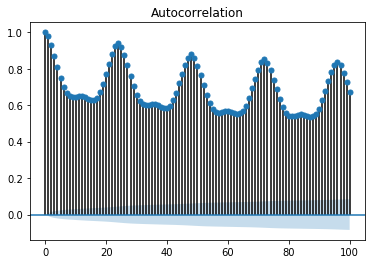

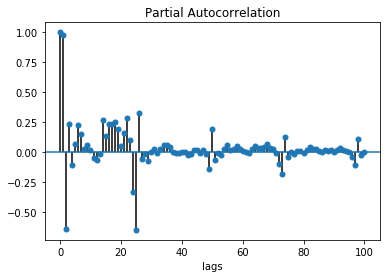

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_acf(df_region_per_hour_ile_de_france_2013_2018['Consommation (MW)'], lags=100)
plot_pacf(df_region_per_hour_ile_de_france_2013_2018['Consommation (MW)'], lags=100)
plt.xlabel('lags')
plt.show()

In [ ]:
### Find (p,q) terms:
From the graph, p = 8 and q=2

In [ ]:
# From CrossValidation  it is (6,10) 

In [29]:
from statsmodels.tsa.arima_model import ARMA

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


NameError: name 'df' is not defined

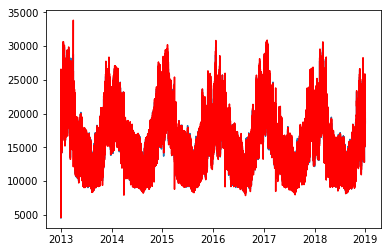

In [31]:
# fitting and plotting  
model = ARMA(df_region_per_hour_ile_de_france_2013_2018['Consommation (MW)'], order=(6,10))
results_MA = model.fit()



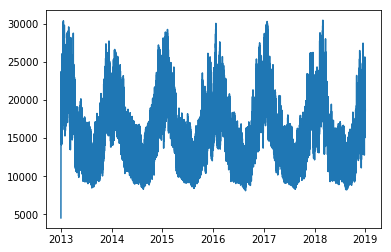

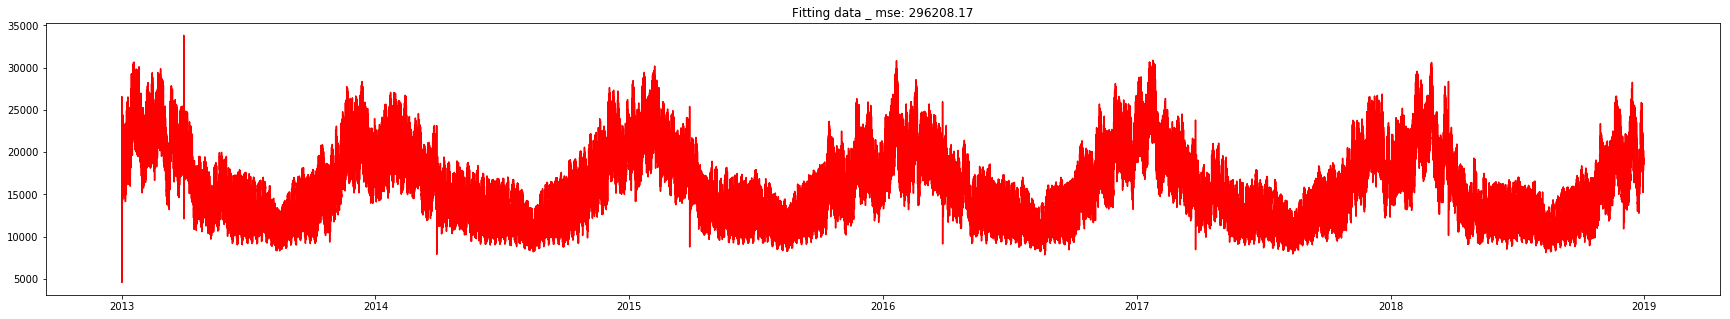

In [40]:
plt.plot(df_region_per_hour_ile_de_france_2013_2018['Consommation (MW)'])
plt.figure(figsize=(30,5))
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ mse: %.2f'% (((results_MA.fittedvalues-df_region_per_hour_ile_de_france_2013_2018['Consommation (MW)'])**2).mean()))
plt.show()

In [42]:
print('Fitting data _MAPE : %.2f'% (((results_MA.fittedvalues-df_region_per_hour_ile_de_france_2013_2018['Consommation (MW)'])**2).mean()))

Fitting data _MAPE : 296208.17


In [43]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [44]:
mean_absolute_percentage_error(df_region_per_hour_ile_de_france_2013_2018['Consommation (MW)'],results_MA.fittedvalues)

2.6873834996593517

In [56]:
help(results_MA.predict)

Help on method predict in module statsmodels.tsa.arima_model:

predict(start=None, end=None, exog=None, dynamic=False) method of statsmodels.tsa.arima_model.ARMAResultsWrapper instance
    predict(self, start=None, end=None, exog=None, dynamic=False)
    
    ARMA model in-sample and out-of-sample prediction
    
    Parameters
    ----------
    
    start : int, str, or datetime
        Zero-indexed observation number at which to start forecasting, ie.,
        the first forecast is start. Can also be a date string to
        parse or a datetime type.
    end : int, str, or datetime
        Zero-indexed observation number at which to end forecasting, ie.,
        the first forecast is start. Can also be a date string to
        parse or a datetime type. However, if the dates index does not
        have a fixed frequency, end must be an integer index if you
        want out of sample prediction.
    exog : array-like, optional
        If the model is an ARMAX and out-of-sample forecas

In [53]:
#make predition:
predictions = results_MA.predict('2018-12-31 00:00:00', '2019-01-08 23:00:00')

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
predictions

In [ ]:
Y_true = 

In [ ]:
(2,10)

(2, 10)

In [ ]:
from statsmodels.tsa.arima_model import ARMA
import itertools
p = q = range(6, 11)
pq = itertools.product(p, q)
for param in pq:  
    try:    
        mod = ARMA(df_region_per_hour_ile_de_france_2013_2018['Consommation (MW)'],order=param)    
        results = mod.fit()    
        print('ARMA{} - AIC:{}'.format(param, results.aic))  
    except:    
        continue

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(6, 6) - AIC:812443.0199095391


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(6, 7) - AIC:811309.9256806356


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(6, 8) - AIC:812192.5657649128
ARMA(6, 9) - AIC:814032.703226297


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(6, 10) - AIC:810192.7000903693


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(7, 6) - AIC:810589.1021858327


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(7, 7) - AIC:811933.115503506


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARMA(7, 8) - AIC:810686.7328618095


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
